# LINEAR DISCRIMINANT ANALYSIS

## BINARY LABELED DATA

### Exam A.1

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
np.random.seed(12)

means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]

N1 = 50
N2 = 40
N = N1 + N2

X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)

# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))

In [12]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)

Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041277  3.04666639]
Mean of Class 2: [ 1.80478915 -0.18249896]


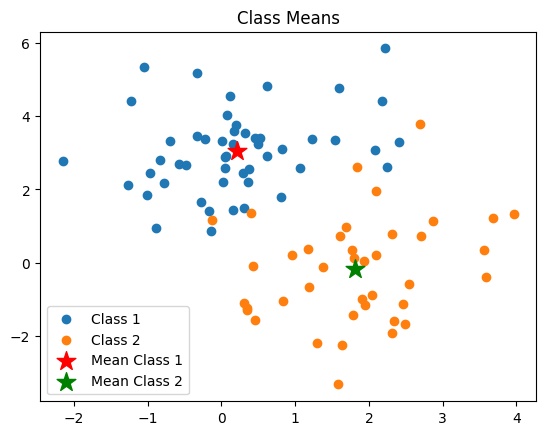

In [19]:
# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [20]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m2 - m1)
S_B = a.dot(a.T)
# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.56211707 -5.16880049]
 [-5.16880049 10.42750887]]
Within-class covariance matrix: S_W =
 [[ 86.83642101  27.51782236]
 [ 27.51782236 140.23997255]]


In [21]:
L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:, 0]
print(w)
print(w.shape)

[-0.89596689 -0.44412085]
(2,)


(50,) (2,)
(2, 50) (2, 40)


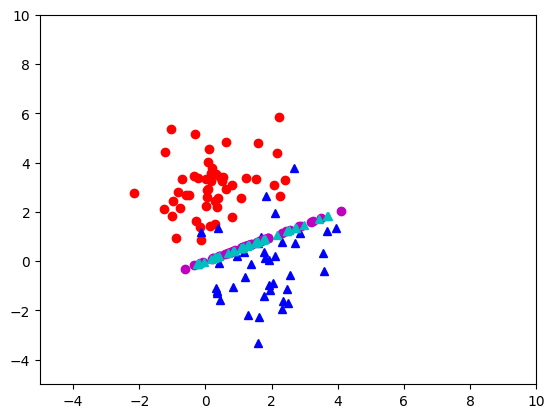

In [92]:
# Visualize data
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
#
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
#Draw projected points
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

### Using SKLearn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA and fit the model
lda = LinearDiscriminantAnalysis(n_components= 1)
print(X.shape, y.shape)
X_lda = lda.fit_transform(X, y)
y_pred = lda.predict(X)
y_pred


(90, 2) (90,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2.])

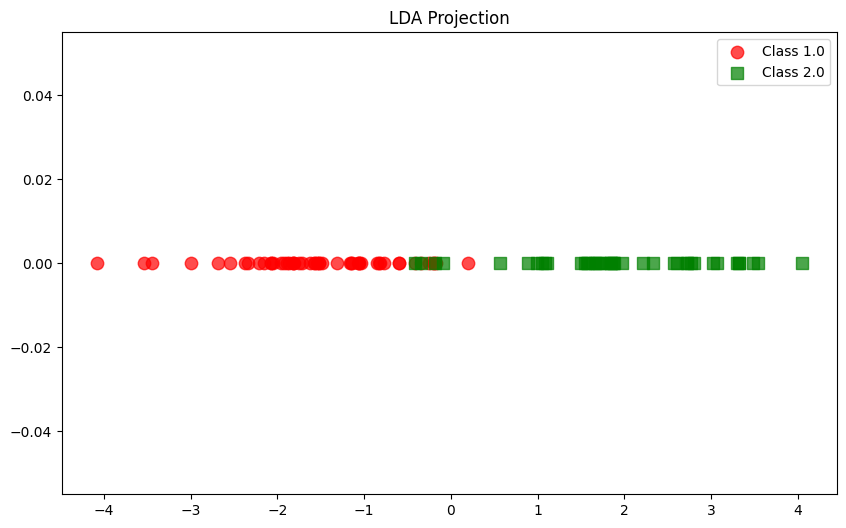

In [35]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, color, marker in zip(sorted(set(y)), colors, markers):
    plt.scatter(X_lda[y == i], [0] * sum(y == i), 
                color=color, marker=marker, label=f'Class {i}', 
                alpha=0.7, s=80)
plt.legend()
plt.title('LDA Projection')
plt.show()

### Exam A.2

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [64]:
df = pd.read_csv('D:\\Machine Learning\\LDA\\data\\pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [65]:
X = df.drop(['class', 'id'], axis=1)
y = df['class']

In [66]:
X.shape

(756, 753)

In [67]:
y.shape

(756,)

In [68]:
y.value_counts()

class
1    564
0    192
Name: count, dtype: int64

Data normalization PCA

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size= 500, random_state=42, stratify= y)


In [71]:
print(X_train.shape)
print(X_test.shape)

(500, 753)
(256, 753)


In [72]:
print(y_train.shape)
print(y_test.shape)

(500,)
(256,)


In [73]:
pca = PCA(n_components= 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.78515625
Confusion Matrix:
 [[ 19  46]
 [  9 182]]


LDA

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components= 1)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.72265625
Confusion Matrix:
 [[ 35  30]
 [ 41 150]]


## Visualize the results

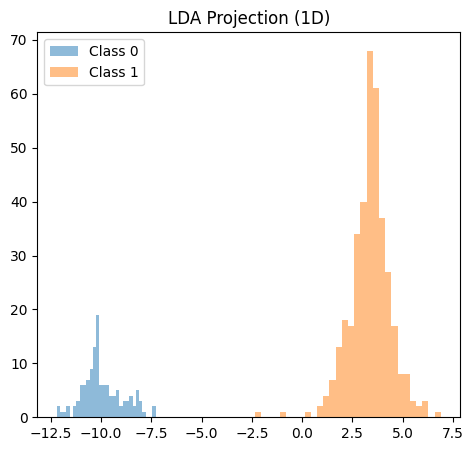

In [58]:
# LDA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    mask = y_train == label
    plt.hist(X_train_lda[mask], alpha=0.5, bins=30, label=f"Class {label}")
plt.title("LDA Projection (1D)")
plt.legend()

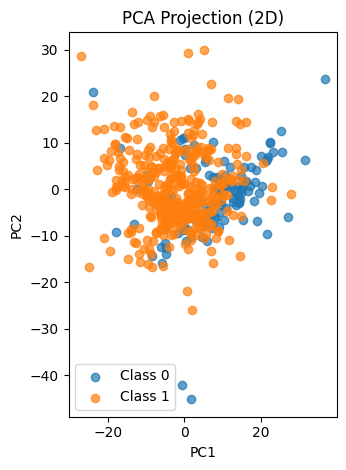

In [59]:
# PCA
plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    mask = y_train == label
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
                alpha=0.7, label=f"Class {label}")
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

PCA explained variance ratio: [0.13156266 0.09143464]


Native

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.83984375
Confusion Matrix:
 [[ 40  25]
 [ 16 175]]


------------------------------------------------------------------------------------
Exam A.2.2

In [ ]:
df = pd.read_csv('D:\\Machine Learning\\LDA\\data\\pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [79]:
df.shape

(756, 755)

In [77]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop(['class', 'id'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)

(567, 753)
(189, 753)


### Naive Bayes Gaussian

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6772486772486772


### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7354497354497355


d:\Machine Learning\multinomial_logistic_regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using LDA and PCA

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [85]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# PCA
pca = PCA(n_components= 2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [87]:
# LDA

lda = LinearDiscriminantAnalysis(n_components= 1)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [88]:
# Naive Bayes
# PCA
nb = GaussianNB()

nb.fit(X_train_pca, y_train)
y_pred = nb.predict(X_test_pca)

print('PCA - Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))


# LDA

nb.fit(X_train_lda, y_train)

y_pred = nb.predict(X_test_lda)

print('LDA - Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))



PCA - Naive Bayes Accuracy: 0.7671957671957672
LDA - Naive Bayes Accuracy: 0.6825396825396826


In [89]:
# Logistic Regression
# PCA

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

print('PCA - Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

# LDA

lr.fit(X_train_lda, y_train)

y_pred = lr.predict(X_test_lda)

print('LDA - Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

PCA - Logistic Regression Accuracy: 0.7883597883597884
LDA - Logistic Regression Accuracy: 0.6878306878306878


### Visualize the results

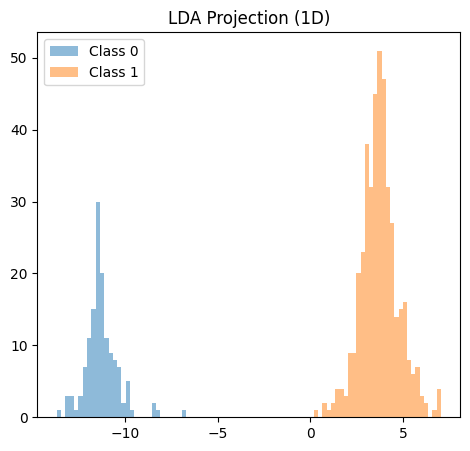

NameError: name 'plt' is not defined

In [1]:
# LDA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in np.unique(y_train):
    mask = y_train == label
    plt.hist(X_train_lda[mask], alpha=0.5, bins=30, label=f"Class {label}")
plt.title("LDA Projection (1D)")
plt.legend()

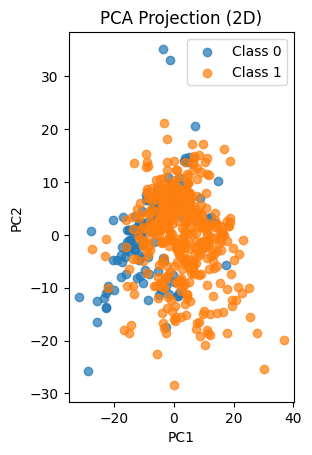

In [94]:
# PCA

plt.subplot(1, 2, 2)
for label in np.unique(y_train):
    mask = y_train == label
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
                alpha=0.7, label=f"Class {label}")
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# Đánh giá
## 1
- Hai mô hình thì mô hình Hồi Quy Logistic cho kết quả tốt hơn so với mô hình Naive Bayes
- Khi sử dụng PCA và LDA thì mô hình Hồi Quy Logistic cho kết quả tốt hơn so với mô hình Naive Bayes
## 2
- Thay đổi dữ liệu nhiều nhất là PCA. Trong khi LDA giúp cải thiện dữ liệu đáng kể cho cả hai mô hình vì nó giữ lại thông tin tốt hơn
* PCA: Cả hai mô hình đều bị giảm độ chính xác. PCA chọn các thành phần chính dựa trên phương sai lớn nhất, nhưng có thể không giữ được cấu trúc phân lớp quan trọng.
* Dữ liệu LDA: Cả hai mô hình đều đạt độ chính xác 1.0, cho thấy LDA đã giúp tối ưu hóa phân tách giữa các lớp, làm cho dữ liệu dễ phân loại hơn

==> LDA tìm kiếm các chiều không gian tối ưu để phân biệt giữa các lớp, giúp cả hai mô hình hoạt động tốt hơn.